## P03
### Carlos Riolo 735124 - Marianne Trujillo 740694 - Úrsula Vargas 740388 
08/05/2023


### Modelo depredador-presa: León, Ñu y Cebra.




### Objetivos.

> #### 1. Objetivo general.
> - Simular un modelo de depredador-presa para leones, ñus y cebras mediante el uso de ecuaciones diferenciales.

> #### 2. Objetivos específicos
> -  Definir nuestras condiciones iniciales para los Leones, Ñus y Cebras.
> -  Plantear y resolver las ecuaciones diferenciales que representan el modelo.
> -  Representar la solución de forma gráfica.


### 2.3 Modelo que representa el problema.


## Enfoque Simplista con Mutualismo

Modelo que describe el comportamiento de las 3 especies (Búfalos, Leones y Cebras, respectivamente):

$$\frac{dx}{dt}=0.405x-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+0.125(0.81xy+0.75yz) $$ 
$$\frac{dz}{dt}= 0.34z-0.75yz+0.02xz$$

- En el Enfoque Simplista, los parámetros de *0.81* y *0.75* son el ratio de muerte por interacción con Leones, los Leones comen más Ñus que Cebras (28% vs. 19%)
- Los términos $xz$ se refieren al mutualismo entre Ñus y Cebras.

## Enfoque Logístico

$$\frac{dx}{dt}=0.405x(1-\frac{x}{12})-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+0.125(xy+yz) $$ 
$$\frac{dz}{dt}= 0.34z(1-\frac{z}{12})-0.75yz+0.02xz$$

- Se introduce el crecimiento Logístico de las Cebras y los Ñus.

## Enfoque Tipo II, combinación de Mutualismo y Logístico

$$\frac{dx}{dt}=0.405x-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+\frac{0.125(xy+yz)}{1+0.5y} $$ 
$$\frac{dz}{dt}= 0.34z-0.75yz+0.02xz$$

- Se incluye un factor limitante en la dínamica del León ya que se asume que este solo mate cuando tenga que alimentarse.

### 2.4 Simulaciones.


In [1]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tspan=[1,20]
cond_in=[10.6,.5,10.5]

### 2.5 Visualización de resultados de simulación.


In [3]:
# Modelo Simplista con Mutualismo
def Modsim(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x-(0.81*x*y)+(0.015*x*z), -1.5*y+(0.125*((0.81*x*y)+(0.75*y*z))), 0.35*z-(0.75*y*z)+(0.02*x*z)]

In [4]:
solsim=solve_ivp(Modsim, tspan, cond_in, max_step=0.1)

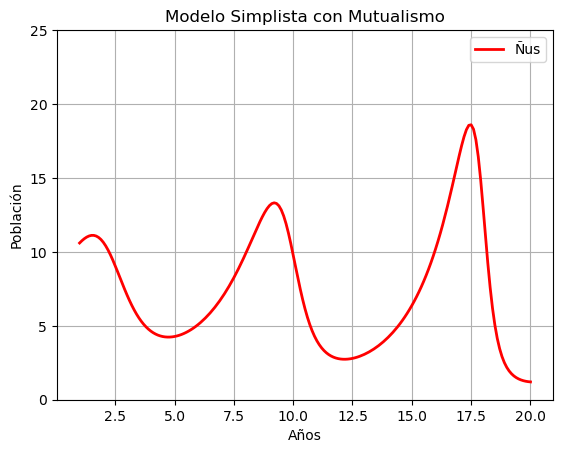

In [30]:
plt.figure()
plt.plot(solsim.t,solsim.y[0], color="r", lw=2, label="Ñus")
plt.ylim(0,25)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Simplista con Mutualismo")
plt.grid()

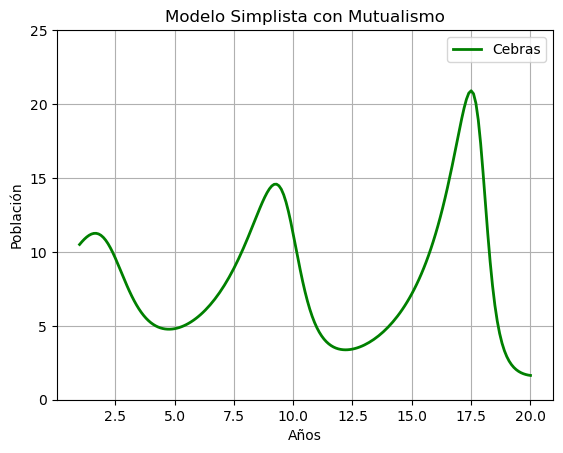

In [29]:
plt.figure()
plt.plot(solsim.t,solsim.y[2], color="g", lw=2, label="Cebras")
plt.ylim(0,25)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Simplista con Mutualismo")
plt.grid()

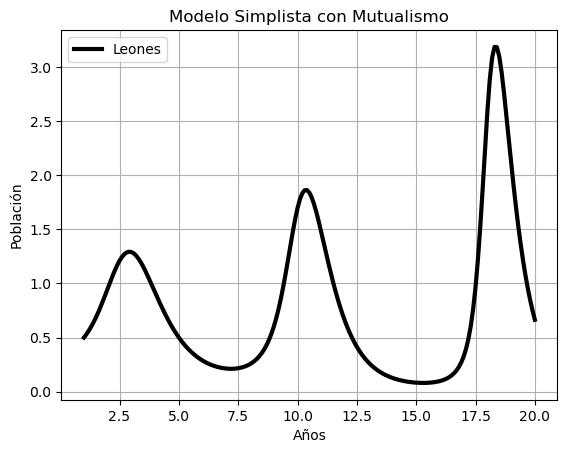

In [27]:
plt.figure()
plt.plot(solsim.t,solsim.y[1], color="k", lw=3, label="Leones")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Simplista con Mutualismo")
plt.grid()

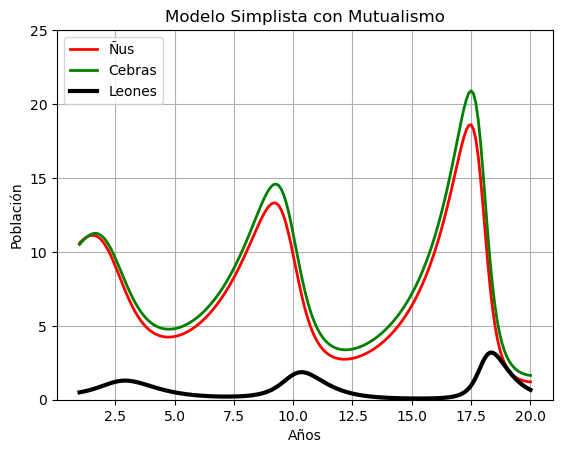

In [26]:
plt.figure()
plt.plot(solsim.t,solsim.y[0], color="r", lw=2, label="Ñus")
plt.plot(solsim.t,solsim.y[2], color="g", lw=2, label="Cebras")
plt.plot(solsim.t,solsim.y[1], color="k", lw=3, label="Leones")
plt.ylim(0,25)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Simplista con Mutualismo")
plt.grid()

In [11]:
#Modelo Logístico
def Modlog(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x*(1-(x/12))-0.81*x*y+0.015*x*z, 
            -1.5*y+0.125*(x*y+y*z),
            0.34*z*(1-(z/12))-0.75*y*z+0.02*x*z]

In [12]:
sollog=solve_ivp(Modlog, tspan, cond_in, max_step=0.1)

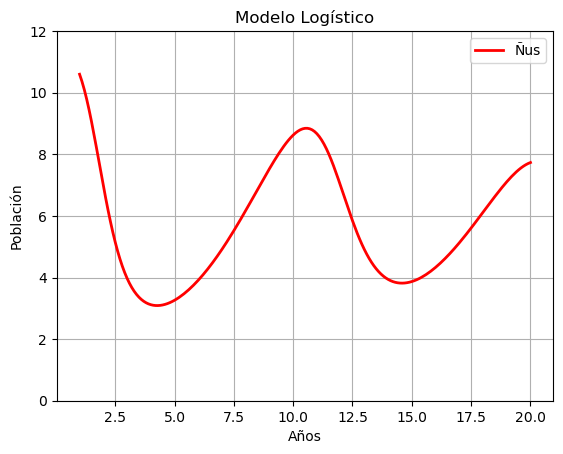

In [42]:
plt.figure()
plt.plot(sollog.t,sollog.y[0], color="r", lw=2, label="Ñus")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,12)
plt.title("Modelo Logístico")
plt.grid()

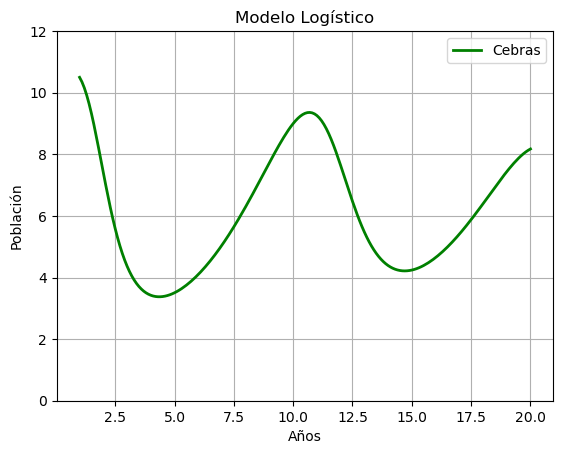

In [32]:
plt.figure()
plt.plot(sollog.t,sollog.y[2], color="g", lw=2, label="Cebras")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,12)
plt.title("Modelo Logístico")
plt.grid()

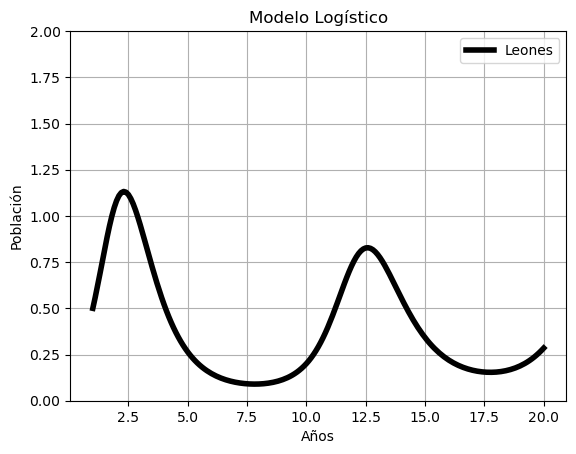

In [33]:
plt.figure()
plt.plot(sollog.t,sollog.y[1], color="k", lw=4, label="Leones")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,2)
plt.title("Modelo Logístico")
plt.grid()

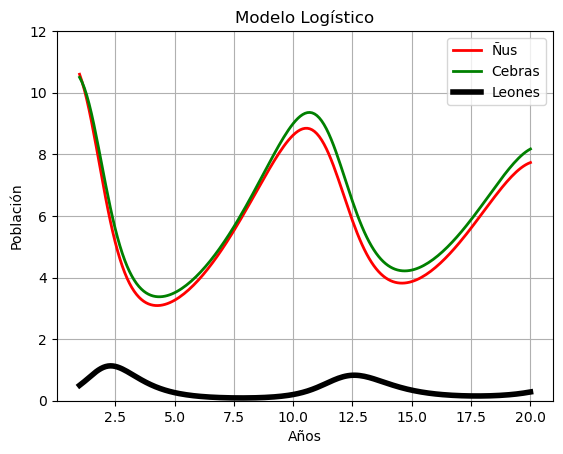

In [41]:
plt.figure()
plt.plot(sollog.t,sollog.y[0], color="r", lw=2, label="Ñus")
plt.plot(sollog.t,sollog.y[2], color="g", lw=2, label="Cebras")
plt.plot(sollog.t,sollog.y[1], color="k", lw=4, label="Leones")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,12)
plt.title("Modelo Logístico")
plt.grid()

In [21]:
ñus = np.array(sollog.y[0])
leones = np.array(sollog.y[1])
zebras = np.array(sollog.y[2])

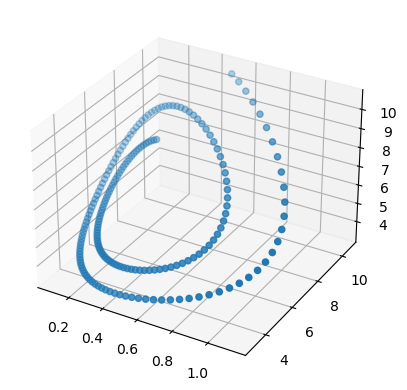

In [24]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(leones,ñus,zebras)
plt.show()

In [18]:
#Tipo II
def Modcom(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x-0.81*x*y+0.015*x*z, 
            (-1.5*y+(0.125*x*y+0.125*y*z))/(1+0.5*y),
            0.34*z-0.75*y*z+0.02*x*z]

In [19]:
solcom=solve_ivp(Modcom, tspan, cond_in, max_step=0.1)

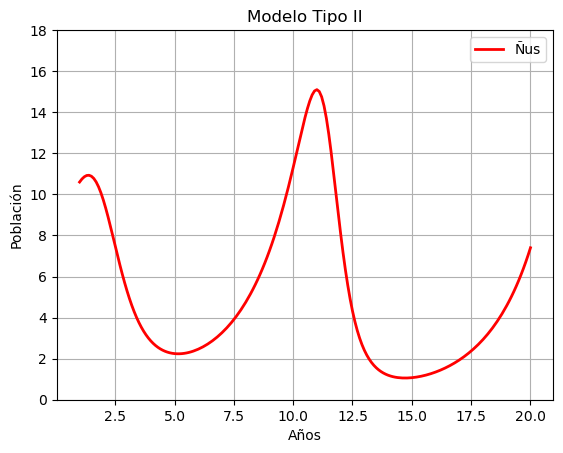

In [35]:
plt.figure()
plt.plot(solcom.t,solcom.y[0], color="r", lw=2, label="Ñus")
plt.ylim(0,18)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Tipo II")
plt.grid()

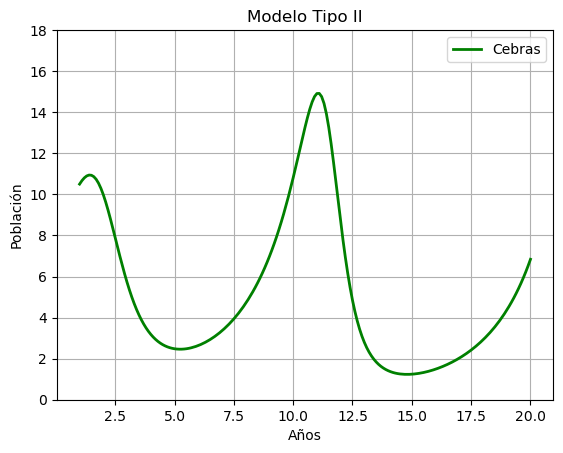

In [36]:
plt.figure()
plt.plot(solcom.t,solcom.y[2], color="g", lw=2, label="Cebras")
plt.ylim(0,18)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Tipo II")
plt.grid()

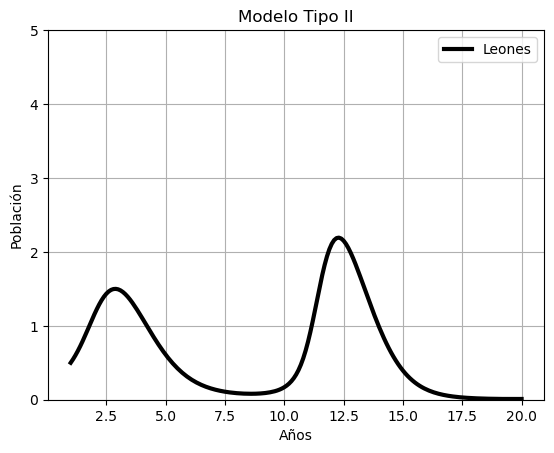

In [37]:
plt.figure()
plt.plot(solcom.t,solcom.y[1], color="k", lw=3, label="Leones")
plt.ylim(0,5)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Tipo II")
plt.grid()

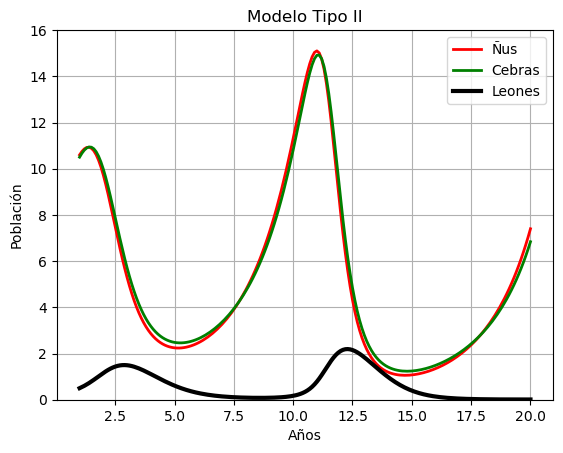

In [40]:
plt.figure()
plt.plot(solcom.t,solcom.y[0], color="r", lw=2, label="Ñus")
plt.plot(solcom.t,solcom.y[2], color="g", lw=2, label="Cebras")
plt.plot(solcom.t,solcom.y[1], color="k", lw=3, label="Leones")
plt.ylim(0,16)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Tipo II")
plt.grid()


### 2.6 Conclusiones. 


* Hemos logrado EXITOSAMENTE simular un modelo de depredador-presa para leones, ñus y cebras mediante el uso de ecuaciones diferenciales
* De igual forma, pudimos definir nuestras condiciones iniciales para los leones, ñus y cebras.
* Con la información obtenida a través de la investigación, se logra plantear y resolver las ecuaciones diferenciales que representan el modelo.
* Finalmente se pudo representar la solución de forma gráfica.

**Interpretación de resultados**

Las simulaciones pueden ayudar a describir las interacciones, pero son muy sensibles a factores externos que normalmente presentan un grado de imprevisibilidad como las sequías, plagas, intervención humana, etc. Debido a esto los modelos de hacen con supuestos que ignoran o mantienen constantes muchos de estos factores para que su simulación sea posible. Podría interpretarse como una tendencia que como un dato confiable, ya que no se aproximan lo suficiente a los censos vistos.


### 2.7 Referencias.        
            Jørgensen, S. E., & Bendoricchio, G. (2001). Fundamentals of Ecological Modelling (Vol. 482). Elsevier. 

            Falcó, J. (2021, 22 febrero). Simulación del Modelo Depredador-Presa de Lotka-Volterra. Javier Falcó. https://www.uv.es/falbe/MatExp/aplicada/modelizacion/Lotka-Volterra/
 
             Libretexts. (2022). 1.4: El modelo de depredador-presa de Lotka-Volterra. LibreTexts Español. https://espanol.libretexts.org/Matematicas/Matematicas_Aplicadas/Biologia_Matematica_(Chasnov)/01%3A_Din%C3%A1mica_poblacional/1.04%3A_El_modelo_de_depredador-presa_de_Lotka-Volterra